# XG_BOOST

### import bibliothèque

In [23]:
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import xgboost as xgb
train = pd.read_csv("./titanic/data/train.csv")
test = pd.read_csv("./titanic/data/test.csv")

##### préparation des jeux d'entraînement et de test

In [24]:
def dataprep(data):
    sexe = pd.get_dummies(data['Sex'], prefix='sex')
    cabin = pd.get_dummies(data['Cabin'].fillna('X').str[0], prefix='Cabin')
    # Age
    age = data['Age'].fillna(data['Age'].mean())
    emb = pd.get_dummies(data['Embarked'], prefix='emb')
    # Prix du billet / Attention une donnée de test n'a pas de Prix !
    faresc = pd.DataFrame(MinMaxScaler().fit_transform(data[['Fare']].fillna(0)), columns = ['Prix'])
    # Classe
    pc = pd.DataFrame(MinMaxScaler().fit_transform(data[['Pclass']]), columns = ['Classe'])
 
    dp = data[['SibSp']].join(pc).join(sexe).join(emb).join(faresc).join(cabin).join(age)
    return dp

In [25]:
Xtrain = dataprep(train)
Xtest = dataprep(test)
y = train.Survived

#### Entraînons maintenant notre algorithme XGBoost. Pour les hyper-paramètres nous prendrons ceux par défaut.

In [26]:
boost = XGBClassifier()
boost.fit(Xtrain, y)
p_boost = boost.predict(Xtrain)
print ("Score Train -->", round(boost.score(Xtrain, y) *100,2), " %")


C:\Users\utilisateur\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:28:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score Train --> 96.63  %


#### exemple d’affectation de paramètres à l’instanciation du classifier

In [27]:
param = {}
param['booster'] = 'gbtree'
param['objective'] = 'binary:logistic'
param["eval_metric"] = "error"
param['eta'] = 0.3
param['gamma'] = 0
param['max_depth'] = 6
param['min_child_weight']=1
param['max_delta_step'] = 0
param['subsample']= 1
param['colsample_bytree']=1
param['silent'] = 1
param['seed'] = 0
param['base_score'] = 0.5
 
clf = xgb.XGBClassifier(param)

C:\Users\utilisateur\anaconda3\lib\site-packages\xgboost\core.py:499: FutureWarning: Pass `objective` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


#### Evaluation

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

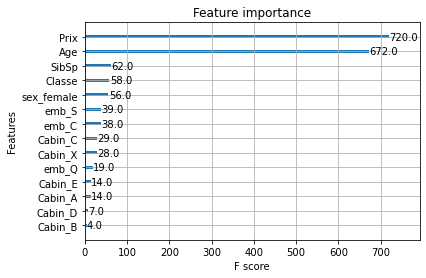

In [28]:
xgb.plot_importance(boost)

#### Sauvegarde d’un modèle entraîné

In [29]:
boost._Booster.save_model('titanic.xbmodel')

In [30]:
boost = xgb.Booster({'nthread': 4}) 
boost.load_model('titanic.xbmodel')